# Introduction to data transformation

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [2]:
# going back a little more than a year to account for trimming
goog = pdr.get_data_yahoo('GOOG', '20180901')

In [3]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282 entries, 2018-09-04 to 2019-10-16
Data columns (total 6 columns):
High         282 non-null float64
Low          282 non-null float64
Open         282 non-null float64
Close        282 non-null float64
Volume       282 non-null int64
Adj Close    282 non-null float64
dtypes: float64(5), int64(1)
memory usage: 15.4 KB


In [4]:
goog.drop(columns=['Adj Close'], inplace=True)

In [8]:
goog["Change"] = goog.Close.diff()
goog['Return'] = np.log(goog.Close).diff()
goog['Volatility'] = goog['Return'].rolling(21).std()
goog['Exp Change'] = (goog.Close * goog.Volatility).shift(1)
goog["Magnitude"] = goog.Change / goog['Exp Change']
goog["Abs Magnitude"] =  np.abs(goog.Magnitude)

In [10]:
goog.dropna(inplace=True)
goog.head()

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Magnitude,Abs Magnitude
Date,,,,,,,,,,,
2018-10-04,1197.510010,1155.576050,1195.329956,1168.189941,2209500,-34.760010,-0.029321,0.011243,11.274431,-3.083083,3.083083
2018-10-05,1173.500000,1145.119995,1167.500000,1157.349976,1184300,-10.839966,-0.009323,0.011084,13.134480,-0.825306,0.825306
2018-10-08,1168.000000,1127.364014,1150.109985,1148.969971,1932400,-8.380005,-0.007267,0.011126,12.827766,-0.653271,0.653271
2018-10-09,1154.349976,1137.572021,1146.150024,1138.819946,1308700,-10.150024,-0.008873,0.011268,12.783547,-0.793991,0.793991
2018-10-10,1132.170044,1081.130005,1131.079956,1081.219971,2675700,-57.599976,-0.051903,0.015482,12.832642,-4.488552,4.488552


In [11]:
goog['Magnitude'].describe()

count    260.000000
mean       0.027345
std        1.454019
min      -11.971994
25%       -0.503482
50%        0.041234
75%        0.568271
max       12.320565
Name: Magnitude, dtype: float64

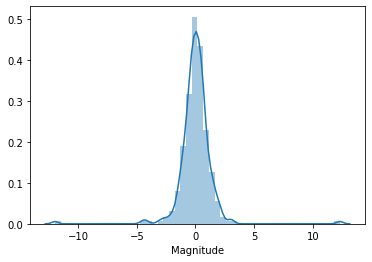

In [12]:
sns.distplot(goog["Magnitude"])

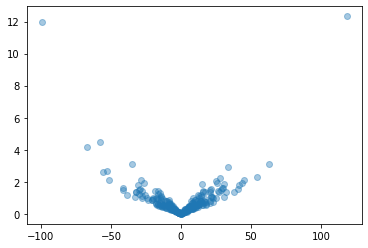

In [14]:
plt.scatter(goog.Change, goog['Abs Magnitude'], alpha=.4)

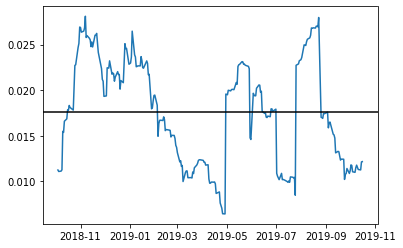

In [15]:
date = np.array(goog.index)
plt.plot(goog.Volatility)
plt.axhline(goog.Volatility.mean(), c='k')